

# **TRABAJO FINAL DATOS**



In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
from sklearn.preprocessing import PolynomialFeatures
import scipy.io
from collections import Counter
import re #sirve para manejar texto y buscar palabras
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from itertools import product
from sklearn.metrics import classification_report

**1. Análisis exploratorio del conjunto de datos**

Carga de datos

In [6]:
data = pd.read_csv('politicES_phase_2_test_codalab.csv')
print("Número de instancias:")
print(data.shape[0])
print("Número de variables:")
print(data.shape[1])

Número de instancias:
43760
Número de variables:
6


In [7]:
print("Variables:")
print(data[:0])

Variables:
Empty DataFrame
Columns: [label, gender, profession, ideology_binary, ideology_multiclass, tweet]
Index: []


In [8]:
print(data.iloc[1772].values)

['0c92efbe64110f10ba794603824cd186' 'male' 'politician' 'left'
 'moderate_left'
 '⚓ Presentaré, mañana en la UE, la estrategia para consolidar la [HASHTAG] como sistema sostenible de producción de . ⚓ Objetivos:. 🔹 Fortalecimiento de las organizaciones de productores. 🔹 Bienestar animal. 🔹 Incremento de mujeres en esta actividad']


In [9]:
print(data.isnull().any())

label                  False
gender                 False
profession             False
ideology_binary        False
ideology_multiclass    False
tweet                  False
dtype: bool




*   Estadística de los datos




30480


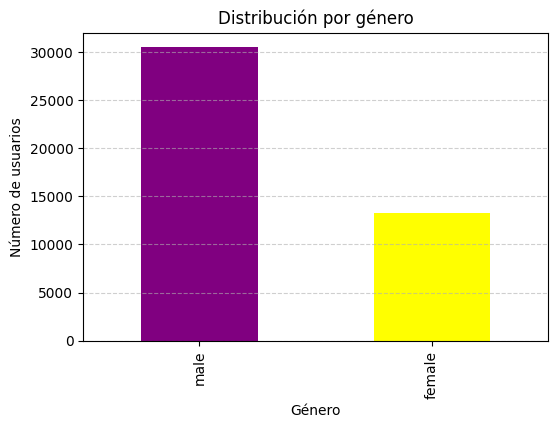

In [10]:
#Género
gender = data['gender']
count= data['gender'].value_counts()
print(count.male)
#Gráfica
plt.figure(figsize=(6,4))
count.plot(kind='bar', color=['purple', 'yellow'])

plt.title("Distribución por género")
plt.xlabel("Género")
plt.ylabel("Número de usuarios")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

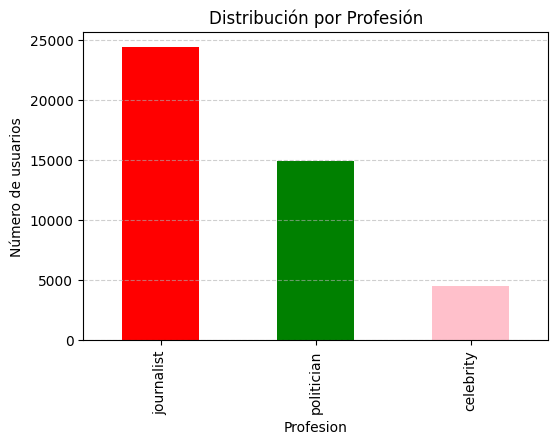

In [11]:
#Profesión
Profession = data['profession']
count= data['profession'].value_counts()
#Gráfica
plt.figure(figsize=(6,4))
count.plot(kind='bar', color=['red', 'green','pink'])

plt.title("Distribución por Profesión")
plt.xlabel("Profesion")
plt.ylabel("Número de usuarios")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

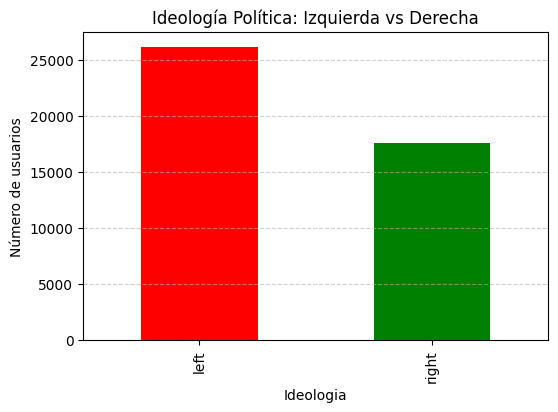

In [12]:
#ideology_binary
Ideologia = data['ideology_binary']
count= data['ideology_binary'].value_counts()
#Gráfica
plt.figure(figsize=(6,4))
count.plot(kind='bar', color=['red', 'green'])

plt.title("Ideología Política: Izquierda vs Derecha")
plt.xlabel("Ideologia")
plt.ylabel("Número de usuarios")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

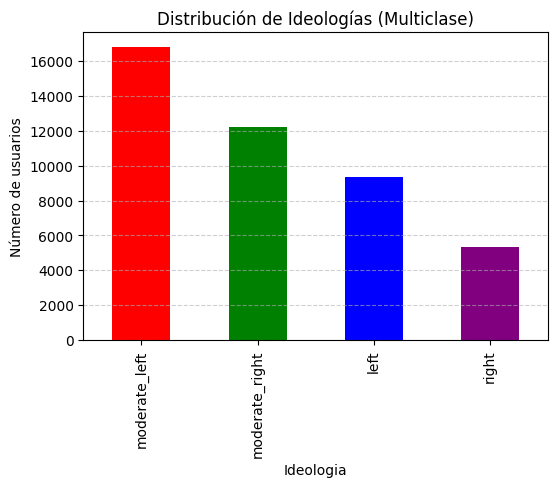

In [13]:
#ideology_multiclass
Ideologia_multi= data['ideology_multiclass']
count= data['ideology_multiclass'].value_counts()
#Gráfica
plt.figure(figsize=(6,4))
count.plot(kind='bar', color=['red', 'green','blue','purple'])

plt.title("Distribución de Ideologías (Multiclase)")
plt.xlabel("Ideologia")
plt.ylabel("Número de usuarios")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

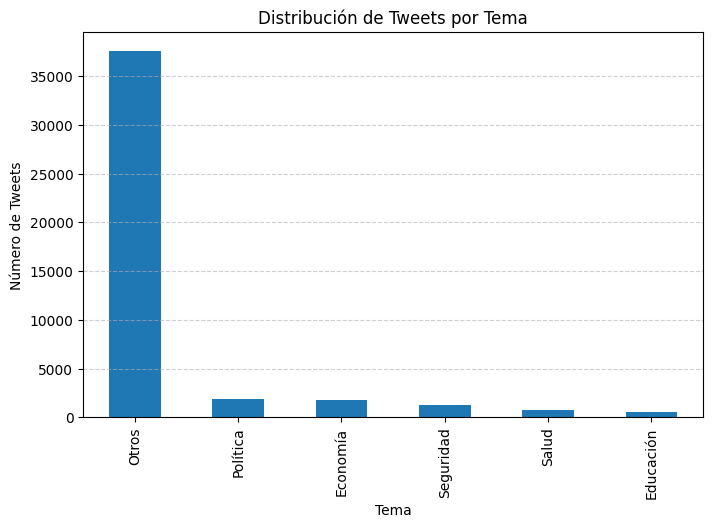

In [14]:
#tweet
temas = {
    "Economía": ["economía", "inflación", "precio", "salario", "pobreza", "impuestos"],
    "Salud": ["covid", "salud", "hospital", "vacuna"],
    "Educación": ["educación", "escuela", "universidad", "estudiante"],
    "Seguridad": ["seguridad", "violencia", "delito", "policía", "crimen"],
    "Política": ["elección", "voto", "campaña", "político", "partido"],
}
def clasificar_tema(texto):
    texto = texto.lower()
    for tema, palabras in temas.items():
        if any(palabra in texto for palabra in palabras):
            return tema
    return "Otros"
data["tema"] = data["tweet"].apply(clasificar_tema)
conteo = data["tema"].value_counts()

plt.figure(figsize=(8,5))
conteo.plot(kind='bar')

plt.title("Distribución de Tweets por Tema")
plt.xlabel("Tema")
plt.ylabel("Número de Tweets")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()




*   Análisis preliminar del texto




In [15]:

import nltk
from nltk.corpus import stopwords

# Descargar stopwords en español (solo la primera vez)
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))
def limpiar_texto(text):
    text = text.lower()  # minusculas
    text = re.sub(r"http\S+", "", text)  # quitar URLs
    text = re.sub(r"[^a-záéíóúñ\s]", "", text)  # quitar signos y números
    text = re.sub(r"politician","", text)
    text = re.sub(r"politicalparty","", text)
    text = re.sub(r"user","", text)
    text = re.sub(r"hashtag","", text)
    return text

# Limpiar los tweets
tweet_limpio = data['tweet'].apply(limpiar_texto)
tweet = " ".join(tweet_limpio).split()# Unir todos los tweets y separar palabras
# Filtrar stopwords y palabras irrelevantes como 'user'
tweet_filtrado = [word for word in tweet if word not in stop_words and word != 'user']
contador = Counter(tweet_filtrado)# Contar palabras
print(contador.most_common(20))# Mostrar las 20 palabras más frecuentes


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('si', 4170), ('hoy', 2848), ('gobierno', 2307), ('españa', 2231), ('gracias', 2184), ('años', 2111), ('ser', 2051), ('madrid', 1821), ('hace', 1667), ('ley', 1543), ('siempre', 1478), ('día', 1456), ('solo', 1435), ('ahora', 1433), ('aquí', 1405), ('puede', 1402), ('así', 1396), ('mejor', 1359), ('bien', 1281), ('hacer', 1237)]


**Palabras más comunes por tipo de ideología**

In [16]:
#tweet
temas = {"left", "moderate_left", "right", "moderate_right"}

tw_left = data[data["ideology_multiclass"] == "left"]["tweet"].apply(limpiar_texto)
tweet_left = " ".join(tw_left).split()# Unir todos los tweets y separar palabras
# Filtrar stopwords y palabras irrelevantes como 'user'
tweet_filtrado_left = [word for word in tweet_left if word not in stop_words and word != 'user']

tw_moderate_left = data[data["ideology_multiclass"] == "moderate_left"]["tweet"].apply(limpiar_texto)
tweet_mod_left = " ".join(tw_moderate_left).split()# Unir todos los tweets y separar palabras
# Filtrar stopwords y palabras irrelevantes como 'user'
tweet_filtrado_mod_left = [word for word in tweet_mod_left if word not in stop_words and word != 'user']

tw_moderate_right = data[data["ideology_multiclass"] == "moderate_right"]["tweet"].apply(limpiar_texto)
tweet_mod_right = " ".join(tw_moderate_right).split()# Unir todos los tweets y separar palabras
# Filtrar stopwords y palabras irrelevantes como 'user'
tweet_filtrado_mod_right = [word for word in tweet_mod_right if word not in stop_words and word != 'user']

tw_right = data[data["ideology_multiclass"] == "right"]["tweet"].apply(limpiar_texto)
tweet_right = " ".join(tw_right).split()# Unir todos los tweets y separar palabras
# Filtrar stopwords y palabras irrelevantes como 'user'
tweet_filtrado_right = [word for word in tweet_right if word not in stop_words and word != 'user']

Ideología: Izquierda

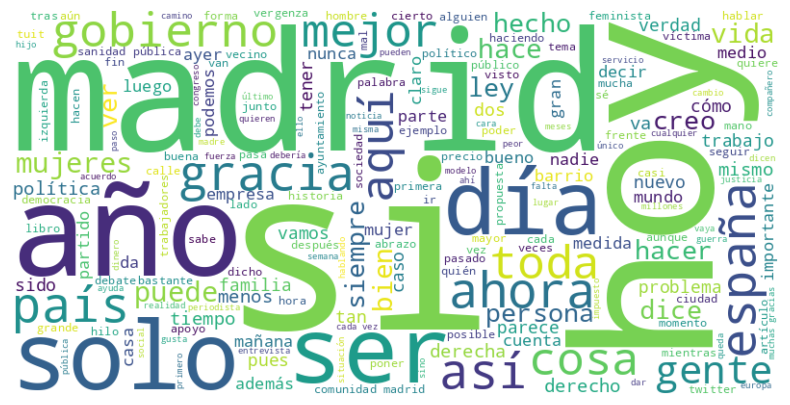

In [17]:
text = " ".join(tweet_filtrado_left)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Idelogía: moderado left

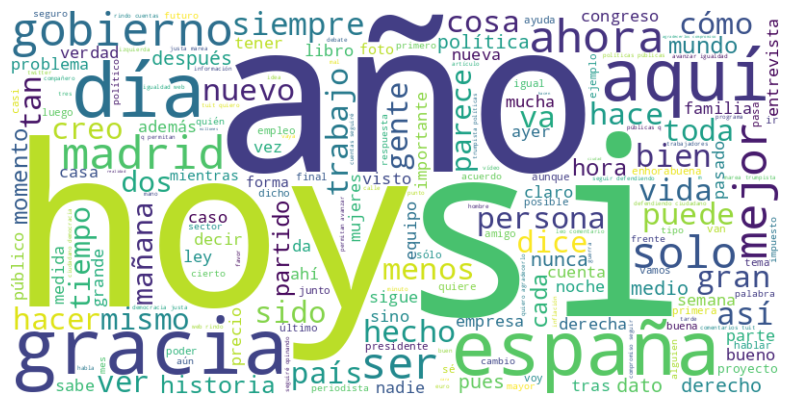

In [18]:
text = " ".join(tweet_filtrado_mod_left)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Ideología: moderado derecha

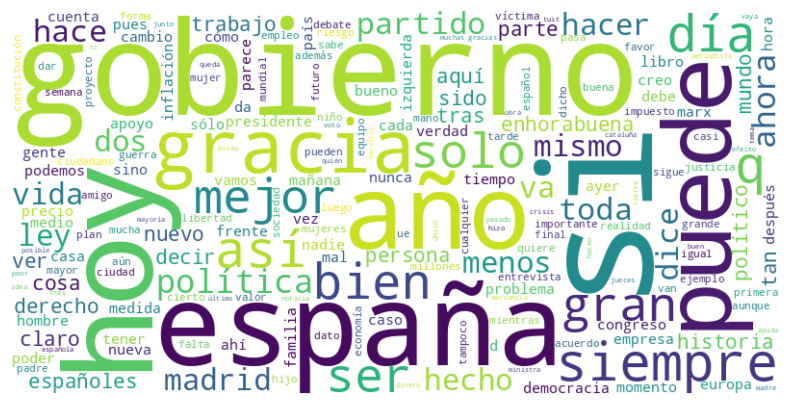

In [19]:
text = " ".join(tweet_filtrado_mod_right)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Ideología: derecha

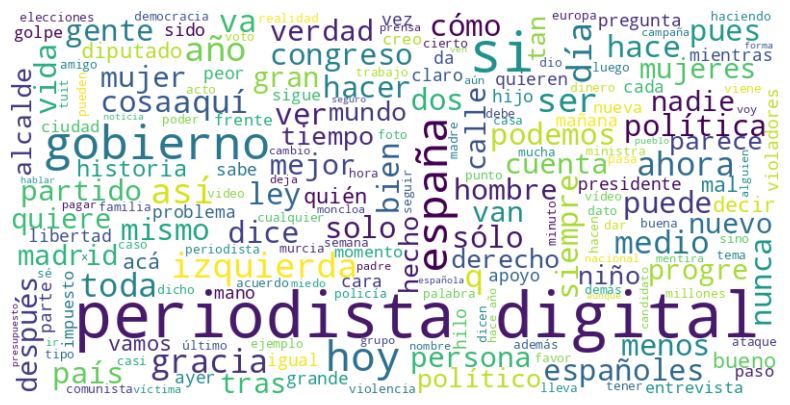

In [20]:
text = " ".join(tweet_filtrado_right)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Genérico

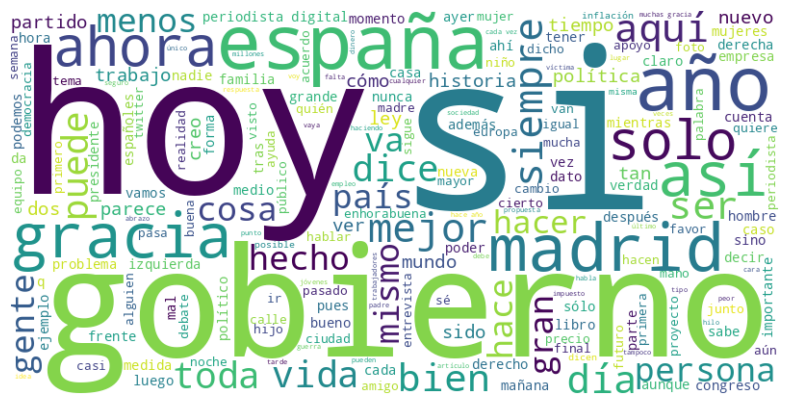

In [21]:

# Crear nube de palabras para todos los tweets
text = " ".join(tweet_filtrado)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# **2. Representacion vectorial**

Comparar las tres distintas estrategias de vectorización vistas en clase:


*   TF-IDF
*   Word2Vec
*   Embeddings contextuales





De la misma forma que hicimos en clase, antes de continuar con la tarea de vectorización, debemos estructurar y limpiar el texto para conservar únicamente la información que nos permita capturar el contenido semántico del corpus. Esto mejorará el resultado de nuestros embeddings. A continuación se listan los pasos que seguiremos para el preprocesamiento:
1.   Manipulación del texto (Text Wrangling)  
2.   Tokenización  
3.   Homogeneización  
4.   Limpieza  

Importación de librerías y descarga de las *stopwords* en español

In [22]:
import re
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

wnl = WordNetLemmatizer()

def check_nltk_packages():
    packages = ['punkt','stopwords','omw-1.4','wordnet']
    for package in packages:
        try:
            nltk.data.find(package)
        except LookupError:
            nltk.download(package)

check_nltk_packages()

try:
    import lxml
except ModuleNotFoundError:
    %pip install lxml

try:
    import contractions
except ModuleNotFoundError:
    %pip install contractions
    import contractions

stopwords_en = stopwords.words('spanish')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


1. Text Wrangling: Eliminamos URLs, HTML y expandimos contracciones

In [23]:
def wrangling(text):
    # Eliminamos HTML
    soup = BeautifulSoup(text, "lxml")
    clean = soup.get_text()

    # Eliminamos URLs
    clean = re.sub(r'https://\S+|www\.\S+', '', clean)

    # Expandimos contracciones
    clean = contractions.fix(clean)

    return clean

En el caso del primer tweet, la versión con Wrangling comparada con la original es la misma ya que dicho tweet no contiene nignuna URL o HTML.

In [24]:
example = data['tweet'].iloc[0]
print("ORIGINAL:\n", example)
print("\nWRANGLING:\n", wrangling(example))


ORIGINAL:
 Ayer, en Guadalajara: feministas arrojaban ácido a católicos que protegían la catedral. Quemaron a mujeres católicas con esas sustancias. Un hombre quiso sacarles los recipientes y le partieron un bate en la cabeza. Terminó internado. ¿Los medios? En absoluto silencio.

WRANGLING:
 Ayer, en Guadalajara: feministas arrojaban ácido a católicos que protegían la catedral. Quemaron a mujeres católicas con esas sustancias. Un hombre quiso sacarles los recipientes y le partieron un bate en la cabeza. Terminó internado. ¿Los medios? En absoluto silencio.


2. Tokenización: Convertimos cada elemento de los tweets en un token. Como se puede ver en el ejemplo los tokems se identifican entre ''.

In [25]:
def tokenize(text):
    return wordpunct_tokenize(text)

example_w = wrangling(example)
print("WRANGLED:\n", example_w)
print("\nTOKENIZADO:\n", tokenize(example_w))


WRANGLED:
 Ayer, en Guadalajara: feministas arrojaban ácido a católicos que protegían la catedral. Quemaron a mujeres católicas con esas sustancias. Un hombre quiso sacarles los recipientes y le partieron un bate en la cabeza. Terminó internado. ¿Los medios? En absoluto silencio.

TOKENIZADO:
 ['Ayer', ',', 'en', 'Guadalajara', ':', 'feministas', 'arrojaban', 'ácido', 'a', 'católicos', 'que', 'protegían', 'la', 'catedral', '.', 'Quemaron', 'a', 'mujeres', 'católicas', 'con', 'esas', 'sustancias', '.', 'Un', 'hombre', 'quiso', 'sacarles', 'los', 'recipientes', 'y', 'le', 'partieron', 'un', 'bate', 'en', 'la', 'cabeza', '.', 'Terminó', 'internado', '.', '¿', 'Los', 'medios', '?', 'En', 'absoluto', 'silencio', '.']


3. Homogenización: Para llevar a cabo la homoegenización del texto, se han convertido todas las letras mayúsculas a minúsculas y se han eliminado los signos de puntuación.

In [26]:
def homogenize(tokens):
    return [tok.lower() for tok in tokens if tok.isalnum()]

example_tok = tokenize(example_w)
print("TOKENIZADO:\n", example_tok)
print("\nHOMOGENEIZADO:\n", homogenize(example_tok))


TOKENIZADO:
 ['Ayer', ',', 'en', 'Guadalajara', ':', 'feministas', 'arrojaban', 'ácido', 'a', 'católicos', 'que', 'protegían', 'la', 'catedral', '.', 'Quemaron', 'a', 'mujeres', 'católicas', 'con', 'esas', 'sustancias', '.', 'Un', 'hombre', 'quiso', 'sacarles', 'los', 'recipientes', 'y', 'le', 'partieron', 'un', 'bate', 'en', 'la', 'cabeza', '.', 'Terminó', 'internado', '.', '¿', 'Los', 'medios', '?', 'En', 'absoluto', 'silencio', '.']

HOMOGENEIZADO:
 ['ayer', 'en', 'guadalajara', 'feministas', 'arrojaban', 'ácido', 'a', 'católicos', 'que', 'protegían', 'la', 'catedral', 'quemaron', 'a', 'mujeres', 'católicas', 'con', 'esas', 'sustancias', 'un', 'hombre', 'quiso', 'sacarles', 'los', 'recipientes', 'y', 'le', 'partieron', 'un', 'bate', 'en', 'la', 'cabeza', 'terminó', 'internado', 'los', 'medios', 'en', 'absoluto', 'silencio']


4. Limpieza: Finalmente, en la limpieza, se ha aplicado la lematización y las stopwords.

In [27]:
def clean(tokens):
    # Lematizamos
    lemmas = [wnl.lemmatize(tok) for tok in tokens]
    # Quitamos stopwords
    cleaned = [tok for tok in lemmas if tok not in stopwords_en]
    return cleaned

example_h = homogenize(example_tok)
print("HOMOGENEIZADO:\n", example_h)
print("\nCLEANED:\n", clean(example_h))


HOMOGENEIZADO:
 ['ayer', 'en', 'guadalajara', 'feministas', 'arrojaban', 'ácido', 'a', 'católicos', 'que', 'protegían', 'la', 'catedral', 'quemaron', 'a', 'mujeres', 'católicas', 'con', 'esas', 'sustancias', 'un', 'hombre', 'quiso', 'sacarles', 'los', 'recipientes', 'y', 'le', 'partieron', 'un', 'bate', 'en', 'la', 'cabeza', 'terminó', 'internado', 'los', 'medios', 'en', 'absoluto', 'silencio']

CLEANED:
 ['ayer', 'guadalajara', 'feministas', 'arrojaban', 'ácido', 'católicos', 'protegían', 'catedral', 'quemaron', 'mujeres', 'católicas', 'sustancias', 'hombre', 'quiso', 'sacarles', 'recipientes', 'partieron', 'bate', 'cabeza', 'terminó', 'internado', 'medios', 'absoluto', 'silencio']


Aplicamos todas las funciones definidas anteriormente en una única función, y a todos los tweets.

In [28]:

def preprocess(text):
    w = wrangling(text)
    t = tokenize(w)
    h = homogenize(t)
    c = clean(h)
    return c

data['clean_tweet'] = data['tweet'].apply(preprocess)


Ahora ya tenemos el texto preprocesado creamos nuestro corpus (diccionario).

Insaltamos la libreria gensim con la que crearemos nuestro diccionario

In [29]:
!pip install gensim

Generamos nuestro diccionario que contiene todas las palabras (tokens) presentes en los tweets después del preprocesamiento.  

In [30]:
from gensim.corpora import Dictionary
mycorpus = data['clean_tweet']
D = Dictionary(mycorpus)
n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])

The dictionary contains 54747 terms
First terms in the dictionary:
0 : absoluto
1 : arrojaban
2 : ayer
3 : bate
4 : cabeza
5 : catedral
6 : católicas
7 : católicos
8 : feministas
9 : guadalajara


Una vez definido el diccionario, filtramos los términos poco o muy comunes de este.


*   Se conservarán las palabras que aparezcan en al menos 30 tweets del corpus.
*   Se eliminarán las palabras que aparezcan en más del 75% de los tweets del corpus.

In [31]:
no_below = 30
no_above = .75

D.filter_extremes(no_below=no_below,no_above=no_above)
n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')

print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])

The dictionary contains 3267 terms
First terms in the dictionary:
0 : absoluto
1 : ayer
2 : cabeza
3 : feministas
4 : hombre
5 : medios
6 : mujeres
7 : quiso
8 : silencio
9 : acaba


Como se puede ver gracias a los prints, inicialmente teniamos un corpus de 54747 términos y después del filtraje extremo tenemos 3266 términos.

**TF-IDF**

Para la construcción de nuestro TF-IDF se han seguido los siguientes pasos:

1.   Construcción del BOW
2.   Aplicación de TF-IDF
3.   Conversión a vector denso


1. Construcción del BoW: En la siguiente celda generamos el BoW con su respectiva representación del primer tweet en el BoW. Cada token está representado con (id_palabra, frecuencia). Es decir, un id único del token, y la frecuencia de este token en cada tweet.

In [32]:
mycorpus_bow = [D.doc2bow(doc) for doc in mycorpus]
mycorpus_bow_flat = [item for sublist in mycorpus_bow for item in sublist]
print("Representación BoW del primer tweet:")
print(mycorpus_bow[0])

Representación BoW del primer tweet:
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


2. Aplicación TF-IDF: Una vez tenemos la representación BoW, a continuación aplicamos TF-IDF sobre esta.
Se ha calculado el TF-IDF tweet por tweet.

In [33]:
from gensim.models import TfidfModel

tfidf = TfidfModel(mycorpus_bow)
tfidf_corpus = [tfidf[doc] for doc in mycorpus_bow]

Como se puede observar en la siguiente celda, se han devuelto 3 resultados:


*   Print 1: Se pasan por pantalla los tokens limpios (antes de aplicar TF-IDF)
*   Print 2: Se pasan por pantalla la estructura TF-IDF devuelta por Gensim, dónde se muestra el id del token con su valor TF-IDF
*   Print 3: Traducción de id del corpus a su respectiva palabra, con su valor TF-IDF asociado.



In [34]:
from termcolor import colored
n_tweet = 0
print(colored("============= Tweet (tokens limpios) =============", "blue"))
print(mycorpus[n_tweet])
print(colored("\n============= Representación TF‑IDF (sparse) =============", "blue"))
print(tfidf_corpus[n_tweet])
print(colored("\n============= Palabras y pesos TF‑IDF =============", "blue"))
print([(D[id], round(float(value), 3)) for id, value in tfidf_corpus[n_tweet]])

============= Tweet (tokens limpios) =============
['ayer', 'guadalajara', 'feministas', 'arrojaban', 'ácido', 'católicos', 'protegían', 'catedral', 'quemaron', 'mujeres', 'católicas', 'sustancias', 'hombre', 'quiso', 'sacarles', 'recipientes', 'partieron', 'bate', 'cabeza', 'terminó', 'internado', 'medios', 'absoluto', 'silencio']

============= Representación TF‑IDF (sparse) =============
[(0, np.float64(0.3899511258227892)), (1, np.float64(0.2651587544154327)), (2, np.float64(0.32996475539255254)), (3, np.float64(0.3647232894865336)), (4, np.float64(0.2709679681403595)), (5, np.float64(0.2833889499508509)), (6, np.float64(0.24070929076539926)), (7, np.float64(0.43211985659264845)), (8, np.float64(0.37057747758931225))]

============= Palabras y pesos TF‑IDF =============
[('absoluto', 0.39), ('ayer', 0.265), ('cabeza', 0.33), ('feministas', 0.365), ('hombre', 0.271), ('medios', 0.283), ('mujeres', 0.241), ('quiso', 0.432), ('silencio', 0.371)]


3. Construcción a vector denso

Finalmente, para poder trabajar con TF-IDF en la red neuronal, debemos convertircada representación TF‑IDF en un vector denso del tamaño del vocabulario.

In [35]:
# Celda nueva: Conversión del TF-IDF a formato denso
from gensim.matutils import sparse2full
import numpy as np

print(colored("\n============= Conversión TF‑IDF a vector denso =============", "blue"))

# Tamaño del vocabulario
vocab_size = len(D)

# Convertir cada documento TF-IDF (sparse) en un vector denso
X_TFIDF = np.array([
    sparse2full(tfidf_doc, vocab_size)
    for tfidf_doc in tfidf_corpus
], dtype=np.float32)

print("Dimensiones de X_TFIDF:", X_TFIDF.shape)
print("Ejemplo del primer vector TF‑IDF (denso):")
print(X_TFIDF[0])



============= Conversión TF‑IDF a vector denso =============
Dimensiones de X_TFIDF: (43760, 3267)
Ejemplo del primer vector TF‑IDF (denso):
[0.38995114 0.26515874 0.32996476 ... 0.         0.         0.        ]


**Word2Vec**

En esta sección hemos vectorizado nuestro texto preprocesado mediante Word2vec, dónde a diferencia de TF-IDF que trabajamos con las frecuencias de las palabras, ahora trabajaremos con los contextos similares de estas. Como en el caso anterior, se listan los pasos que se han seguido:


1.   Entrenamiento del modelo y obtención vectores promedio
2.   Exploración del vocabulario
3. Visualzación mediante t-SNE




1. Entrenamiento del modelo y obtención vectores promedio

Entrenamos nuestro Word2Vec definiendo los siguientes parámetros:


*   `window=5` indicamos cuántas palabras cercanas se consideran para aprender las relaciones semánticas. En nuestro caso, 5.
*  `vector_size=200`Cada palabra se representa mediante un vector de dimensión.
*   sentences=mycorpus entrenamos nuestro Word2vec sobre nuestro texto preprocesado.





In [36]:
from gensim.models import Word2Vec
# Entrenamiento del modelo Word2Vec sobre tus tweets
model_w2v = Word2Vec(
    sentences=mycorpus,
    vector_size=200,
    window=5,
    min_count=5,
    workers=4,
    seed=42
)

Creamos vectores promedio por cada tweet. Este promedio resume el significado global del tweet.

In [37]:
import numpy as np
from termcolor import colored
# Crear un vector promedio por tweet (documento)
document_vectors = []
for doc in mycorpus:
    vectors = [model_w2v.wv[word] for word in doc if word in model_w2v.wv]
    if vectors:
        avg_vector = np.mean(vectors, axis=0)
        document_vectors.append(avg_vector)
    else:
        # Si el tweet no contiene palabras del vocabulario, añadimos un vector nulo
        document_vectors.append(np.zeros(model_w2v.vector_size))

document_vectors = np.array(document_vectors)

print("Tamaño:", document_vectors.shape)
print(colored('\n============= Word2Vec vocabulary =============', 'blue'))
words = list(model_w2v.wv.key_to_index)
print(words[:20])
print(colored('\n============= Embedding of the first word =============', 'blue'))
print(model_w2v.wv[words[0]])


Tamaño: (43760, 200)

============= Word2Vec vocabulary =============
['user', 'politician', 'si', 'hashtag', 'hoy', 'gobierno', 'españa', 'gracias', 'años', 'ser', 'madrid', 'hace', 'ley', 'toda', 'siempre', 'solo', 'día', 'ahora', 'aquí', 'puede']

============= Embedding of the first word =============
[ 1.05203837e-01  4.73488271e-01 -2.19711140e-02 -8.39527771e-02
 -1.72336370e-01 -2.44375765e-01 -3.23022813e-01  7.10872829e-01
 -7.81537518e-02 -2.85919011e-01 -5.86169422e-01  3.01431492e-02
  7.27512836e-01  3.21104109e-01  1.14510641e-01 -6.38247514e-03
 -9.93054435e-02 -5.59492469e-01  6.83193037e-04 -5.22192121e-01
  4.29894000e-01  7.32883036e-01 -3.51537578e-02  6.80069506e-01
  3.02157581e-01  2.51296192e-01 -2.29482159e-01  9.05726254e-01
  1.66843571e-02 -5.08122206e-01 -1.09352596e-01 -2.12594658e-01
 -3.80963951e-01 -2.17744887e-01 -8.63204822e-02 -6.07614636e-01
 -4.05918248e-02  9.70358327e-02 -4.10854965e-01  4.59742248e-01
 -1.07435033e-01 -3.06936093e-02  4.0903872

2. Exploración del vocabulario

Para explorar la relación semántica entre palabras existe la función most_similar() que calcula qué palabras están más cercanas a un término dado dentro del espacio vectorial, basándose en la similitud del coseno entre sus embeddings.

In [38]:
wv = model_w2v.wv

print("\nPalabras más similares a 'mujeres':")
print(wv.most_similar(positive="mujeres", topn=10))

print("\nPalabras más similares a 'gobierno':")
print(wv.most_similar(positive="gobierno", topn=10))



Palabras más similares a 'mujeres':
[('violencia', 0.9349645972251892), ('víctimas', 0.93482506275177), ('machista', 0.9061447978019714), ('género', 0.9003177881240845), ('derechos', 0.8912954926490784), ('intrafamiliar', 0.8536984920501709), ('reproductivos', 0.8536612391471863), ('toda', 0.8508409857749939), ('violencias', 0.8297961354255676), ('vicaria', 0.8279358744621277)]

Palabras más similares a 'gobierno':
[('sedición', 0.9078263640403748), ('socialcomunista', 0.8847928047180176), ('constitucional', 0.8836972713470459), ('delito', 0.8820071220397949), ('politician', 0.8739014863967896), ('tribunal', 0.8654637932777405), ('oposición', 0.8632647395133972), ('mayoría', 0.8630357980728149), ('malversación', 0.8625891804695129), ('cgpj', 0.8578210473060608)]


El modelo muestra, por ejemplo, que la palabra **"mujeres"** se asocia con términos como *"víctimas"*, *"violencia"*, *"género"* o *"derechos"*, lo que indica que ha captado correctamente el contexto social y temático en el que suele aparecer.  

En el caso de **"gobierno"**, las palabras más cercanas son *"socialcomunista"*, *"sedición"*, *"constitucional"* o *"oposición"*, lo que refleja un entorno político y discursivo coherente con el contenido del corpus.  

Estas relaciones confirman que el modelo Word2Vec ha aprendido representaciones semánticas útiles, donde la proximidad entre vectores refleja similitud de significado o de contexto.


A continuación, utilizamos el algoritmo T-SNE para proyectar los embeddings en dos dimensiones y visualizar cómo se agrupan las palabras según su significado. Dado que el vocabulario completo es muy grande, se ha limitado la visualización a las 500 primeras palabras del modelo. Esto permite obtener una representación más clara y legible, evitando el solapamiento excesivo de puntos y reduciendo el coste computacional de la técnica.

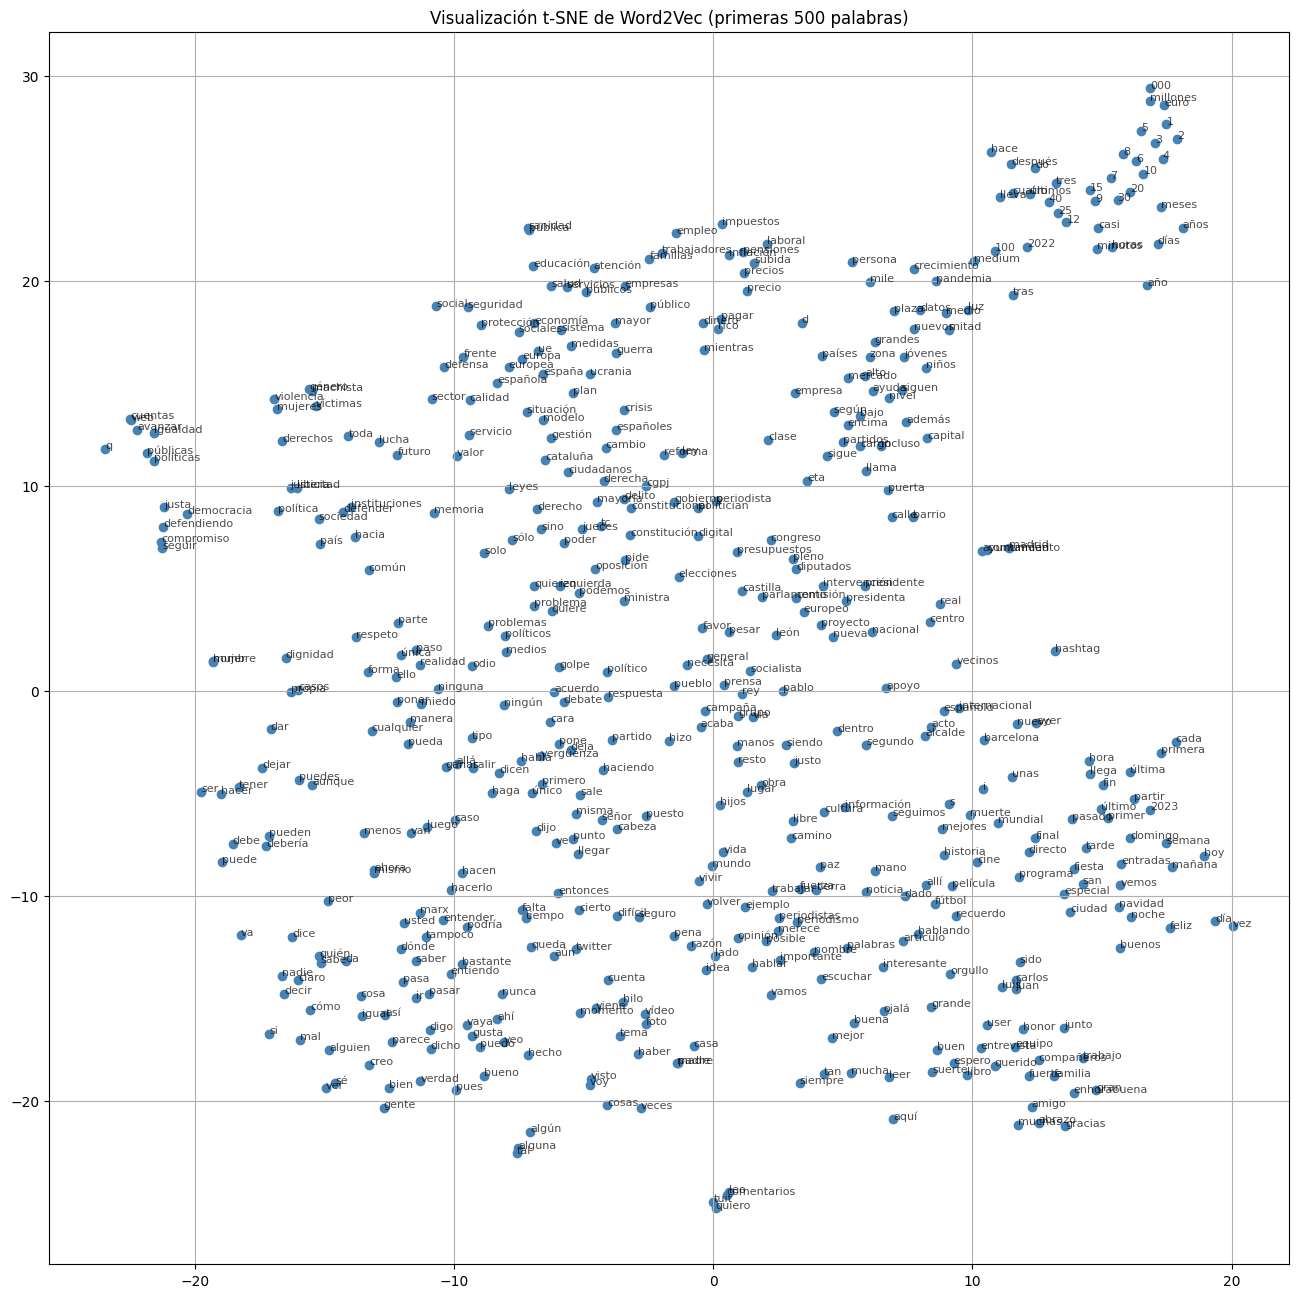

In [39]:
from sklearn.manifold import TSNE
tsne = TSNE(init='random', random_state=42)
embed_tsne = tsne.fit_transform(wv.vectors[:500])
fig, ax = plt.subplots(figsize=(16, 16))
for idx, word in enumerate(list(wv.key_to_index.keys())[:500]):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(word, (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7, fontsize=8)
plt.title("Visualización t-SNE de Word2Vec (primeras 500 palabras)")
plt.grid(True)
plt.show()

Algunas de las representaciones por embeddings:
*   "congreso", "pleno", "diputados", "parlamento", "europeo"
*   "dignidad", "justicia", "libertad", "sociedad"

**Embeddings contextuales - BERT**

BERT (Bidirectional Encoder Representations from Transformers) es un modelo de lenguaje entrenado previamente que utiliza la arquitectura Transformer.

En esta etapa, el objetivo no es analizar el funcionamiento interno del modelo, sino aprovechar los vectores de representación (embeddings) que genera a partir de los textos de entrada.

Cargamos el modelo y el tokenizador de BERT

In [40]:
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True)
model.eval()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

Una vez cargado el modelo, generaremos los embeddings con BERT. Utilizamos los tweets preprocesados para obtener sus representaciones vectoriales mediante el modelo preentrenado.  
Para cada tweet, se añaden los tokens especiales `[CLS]` y `[SEP]`, se tokeniza el texto y se obtiene la salida del modelo.  
Finalmente, se promedian los vectores de los tokens para generar un embedding único por tweet, que resume su significado de forma contextual.


Cabe mencionar que, para reducir el coste computacional y disminuir el tiempo de ejecución, trabajaremos únicamente con 2000 tweets.

In [ ]:
bert = []
for n, doc in enumerate(mycorpus[:6000]):
    print(f'\rBert #{n + 1} out of {len(mycorpus[:6000])}', end='', flush=True)

    # Se añaden tokens especiales
    marked_text = "[CLS] " + ' '.join(doc) + " [SEP]"

    # Comversión de la frase a tokens
    tokenized_text = tokenizer.tokenize(marked_text)
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

    # Todos los tokens se asignan al pprimer segmento ya que solo se procesa una frase
    segments_ids = [1] * len(tokenized_text)

    # Crear tensores de tokens y segmentos
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensors = torch.tensor([segments_ids])

    # Generación embeddings con BERT
    with torch.no_grad():
        outputs = model(tokens_tensor, segments_tensors)

    # Obtenemos los hidden states (última capa)
    hidden_states = outputs.hidden_states

    # Queremos un vector por frase, así que hacemos la media de los vectores
    token_vecs = hidden_states[-2][0]  # Penúltima capa, tokens de la frase
    sentence_embedding = torch.mean(token_vecs, dim=0)  # Promedio para obtener el embedding de la frase

    # Guardamos el embedding
    bert.append(sentence_embedding)

# Mostramos el vector del primer documento
print("Representación de Bert del primer tweet:")
print(bert[0])

Bert #1577 out of 6000

Ahora, analizaremos si esque esta extrayendo conclusiones correctas, es decir veremos si está analizando bien. Para ello usaremos los 5 primeros tweets y calcularemos su similitud.

In [ ]:
print("\n============= Texto de los primeros 5 tweets =============")
for i in range(5):
    print(f"\nTweet #{i+1}:")
    print(" ".join(mycorpus[i]))

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from termcolor import colored

# Convertimos los embeddings de BERT a una matriz numpy
bert_matrix = np.array([b.numpy() for b in bert])

# Calculamos la similitud coseno entre los primeros 5 tweets
similarities = cosine_similarity(bert_matrix[:5])

print(colored("============= Similitud entre los primeros 5 tweets (BERT embeddings) =============", "blue"))
print(np.round(similarities, 3))


Todos los valores fuera de la diagonal están por encima de 0.85, y muchos rondan 0.95.Esto nos indica que los 5 tweets son muy similares en contenido o temática según BERT.

Lo que mas destaca es que los tweets 1 y 3 tienen una similitud de 0.963, casi idénticos. Dicha interpretación es correcta ya que el tono, el tema del discurso son muy similares.

### **3. Modelado y evaluación**


1.   Una red neuronal implementada con Pytorch
2.   Otro algoritmo de Scikit-learn



Empezaremos con la red neuronal

Para empezar, definimos una función para la red neuronal, en el que diferenciamos las diferentes capas, de las que destacamos capas lineales, ReLUs y una de DropOut que ayuda a gestionar y reducir el sobreajuste, desactivando aleatoriamente neuronas de la red.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class ClassifierNN(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, output_dim=2):
        hidden_dim_2 = hidden_dim // 2
        super(ClassifierNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, hidden_dim_2),
            nn.ReLU(),
            nn.Linear(hidden_dim_2, output_dim)
        )

    def forward(self, x):
        return self.model(x)


Definición de la función de entrenamiento del classificador

In [ ]:
def train_classifier__(X, Y, epochs=100, learning_rate=0.001, hidden_dim=128, batch_size=32):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, f1_score
    from torch.utils.data import TensorDataset, DataLoader

    # Ajuste automático de tamaños
    n_samples_X = X.shape[0]
    n_samples_Y = Y.shape[0]

    if n_samples_X != n_samples_Y:
        print(f"[ADVERTENCIA] X tiene {n_samples_X} muestras y Y tiene {n_samples_Y}.")
        print(f"Recortando Y a {n_samples_X} muestras para que coincidan.")
        Y = Y[:n_samples_X]

    # División entrenamiento/prueba
    X_train, X_test, y_train, y_test = train_test_split(X.numpy(), Y.numpy(), test_size=0.2, random_state=42)

    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)

    input_dim = X.shape[1]
    output_dim = len(np.unique(Y.numpy()))
    model = ClassifierNN(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    history = {"loss": [], "accuracy": [], "f1": []}
    test_history = {"loss": [], "accuracy": [], "f1": []}

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            preds = torch.argmax(outputs, dim=1)
            acc = accuracy_score(y_train_tensor.numpy(), preds.numpy())
            f1 = f1_score(y_train_tensor.numpy(), preds.numpy(), average='weighted')

        history["loss"].append(loss.item())
        history["accuracy"].append(acc)
        history["f1"].append(f1)

        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor)
            test_preds = torch.argmax(test_outputs, dim=1)
            test_acc = accuracy_score(y_test_tensor.numpy(), test_preds.numpy())
            test_f1 = f1_score(y_test_tensor.numpy(), test_preds.numpy(), average='weighted')

        test_history["loss"].append(test_loss.item())
        test_history["accuracy"].append(test_acc)
        test_history["f1"].append(test_f1)

        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Acc: {acc:.4f}, F1: {f1:.4f}")
            print(f"Test Loss: {test_loss.item():.4f}, Test Acc: {test_acc:.4f}, Test F1: {test_f1:.4f}")

    return model, history, test_history


Definimos funciones de visualización para comparar las métricas y así poder evaluar la red neuronal

auc , roc y cross entropy loss, matriz de confusion (añadir estos)

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, test_history, title='Loss'):
    plt.figure(figsize=(10, 6))
    plt.plot(history["loss"], label="Training Loss")
    plt.plot(test_history["loss"], label="Test Loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()

def plot_accuracy(history, test_history, title='Accuracy'):
    plt.figure(figsize=(10, 6))
    plt.plot(history["accuracy"], label="Training Accuracy")
    plt.plot(test_history["accuracy"], label="Test Accuracy")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

def plot_f1(history, test_history, title='F1 Score'):
    plt.figure(figsize=(10, 6))
    plt.plot(history["f1"], label="Training F1")
    plt.plot(test_history["f1"], label="Test F1")
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.title(title)
    plt.legend()
    plt.show()


Y por último, para inicializar el modelo basado en la red neuronal, y utilizando la vectorización que mejor consideremos (preguntada al usuario) se procede a la tarea de regresión??. Imprimimos las variables cada 50 épocas y las representaciones gráficas.

In [ ]:
if __name__ == "__main__":
    # Construir TF-IDF correcto
    from gensim.matutils import sparse2full

    X_TFIDF = np.array([
        sparse2full(tfidf_doc, vocab_size)
        for tfidf_doc in tfidf_corpus
    ], dtype=np.float32)

    X_TFIDF = torch.tensor(X_TFIDF, dtype=torch.float32)

    # Word2Vec
    X_Word2Vec = torch.tensor(np.array(document_vectors), dtype=torch.float32)

    # BERT
    X_BERT = torch.tensor(np.array([b.numpy() for b in bert]), dtype=torch.float32)

    # Variable objetivo
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(data['ideology_multiclass'])
    Y = torch.tensor(y, dtype=torch.long)

    # Selección de vectorización
    modelo_usado = input("[T]FIDF, [W]ord2Vec o [B]ERT? \n")
    if modelo_usado == "T":
        X = X_TFIDF
    elif modelo_usado == "W":
        X = X_Word2Vec
    elif modelo_usado == "B":
        X = X_BERT
    else:
        print("Modelo no reconocido")
        exit()

    if torch.isnan(X).any():
        raise ValueError("Datos de entrada contienen NaN.")

    # Entrenamiento del modelo
    model, history, test_history = train_classifier__(X, Y, epochs=300, learning_rate=0.0001, hidden_dim=256)

    # Mostrar resultados
    plot_loss(history, test_history)
    plot_accuracy(history, test_history)
    plot_f1(history, test_history)


**Algortimos Scikit-learn**

Emplearemos los algoritmos de:

*   Logisitic regresion
*   Random forest
*   KNN






Datos en formato float

In [ ]:
    # TF-IDF
    X_TFIDF = np.array([
        sparse2full(tfidf_doc, vocab_size)
        for tfidf_doc in tfidf_corpus
    ], dtype=np.float32)

    # Word2Vec
    X_Word2Vec = np.array(document_vectors, dtype=np.float32)

    # BERT
    X_BERT = np.array([b.numpy() for b in bert], dtype=np.float32)

Función división de datos en conjuto de train,test y validación

In [ ]:
def split_data(X, Y):
    # Ajuste automático de tamaños
    Y = np.array(Y).reshape(-1)
    n_samples_X = X.shape[0]
    n_samples_Y = Y.shape[0]
    if n_samples_X != n_samples_Y:
        print(f"[ADVERTENCIA] X tiene {n_samples_X} muestras y Y tiene {n_samples_Y}.")
        print(f"Recortando Y a {n_samples_X} muestras para que coincidan.")
        Y = Y[:n_samples_X]
    #División X_rest (90) + test (10)
    X_rest, X_test, Y_rest, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42, stratify=Y)
    val_ratio = 0.20 / 0.90
    #División X_train y X_val
    X_train, X_val, Y_train, Y_val = train_test_split(X_rest, Y_rest, test_size=val_ratio, random_state=42, stratify=Y_rest)
    #Dimensiones finales
    print(f"Train: {len(X_train)} muestras ({len(X_train)/len(X)*100:.1f}%)")
    print(f"Val:   {len(X_val)} muestras ({len(X_val)/len(X)*100:.1f}%)")
    print(f"Test:  {len(X_test)} muestras ({len(X_test)/len(X)*100:.1f}%)")
    return X_train, X_val, X_test, Y_train, Y_val, Y_test



**Logistic regresion**

Para usar este clasificador tendremos que tener en cuenta que necesitamos:


*   Estandarización de los datos
*   Validación cruzada para los hiperpámetros



Primero definimos la función genérica del clasificador, con un 70% de datos para train y 30% para test (esto se podría estudiar cual es el mejor balance)

Función de clasificación

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, log_loss, confusion_matrix, classification_report)
def logistic_reg_class (X_train, X_test,Y_train,Y_test, C):
  # Nombre clases
   target_names = ['left', 'moderate_left', 'moderate_right', 'right']
  #Estandarizamos los datos
   scaler = StandardScaler()
   X_train_scaled = scaler.fit_transform(X_train)
   X_test_scaled = scaler.transform (X_test)
  #Entrenamos el modelo
   clfk = LogisticRegression(C=C, max_iter=2000, random_state=42, solver='lbfgs', class_weight = 'balanced')
   clfk.fit(X_train_scaled, Y_train)
  #Evaluamos
   y_pred = clfk.predict(X_test_scaled)
   y_pred_proba = clfk.predict_proba(X_test_scaled)
   #Métricas
   #Accuracy
   accuracy = accuracy_score(Y_test, y_pred)
   print(f"Accuracy: {accuracy:.4f}")
   #F1-score
   f1 = f1_score(Y_test, y_pred,  average='weighted') #Weighted para multiclase
   #AUC-ROC
   auc_roc = roc_auc_score(Y_test, y_pred_proba, multi_class='ovr', average='weighted')
   print(f"AUC-ROC (weighted): {auc_roc:.4f}")
   # 4. Cross-Entropy Loss (Log Loss)
   cross_entropy = log_loss(Y_test, y_pred_proba)
   print(f"Cross-Entropy Loss: {cross_entropy:.4f}")
   # 5. Matriz de Confusión
   print("\nMatriz de Confusión:")
   cm = confusion_matrix(Y_test, y_pred)
   #Representamos gráficamente
   fig, ax = plt.subplots(figsize=(6, 5))
   ax.imshow(cm, cmap="Blues")
   # Títulos y ejes
   ax.set_title("Matriz de Confusión")
   ax.set_xlabel("Predicción")
   ax.set_ylabel("Valor Real")

   # Etiquetas de ticks
   ax.set_xticks(np.arange(len(target_names)))
   ax.set_yticks(np.arange(len(target_names)))
   ax.set_xticklabels(target_names)
   ax.set_yticklabels(target_names)

   # Rotación del eje X
   plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

   # Escribir los números dentro de la matriz
   for i in range(len(target_names)):
       for j in range(len(target_names)):
           ax.text(j, i, cm[i, j], ha="center", va="center")

   plt.tight_layout()
   plt.show()
   #Métricas para cada clase
   print(classification_report(Y_test, y_pred, target_names=target_names))

Validación

In [ ]:
def logistic_validation (C_values,X_train, X_val, Y_train, Y_val, max_iter):
  #Creamos vector donde guardaremos los valores
  val_C = np.zeros((len(C_values)))
  # Estandarizar datos
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_val_scaled = scaler.transform(X_val)
  # Evaluamos el error para cada valor de C
  for i, C in enumerate(C_values):
      clfk = LogisticRegression(C=C, max_iter=max_iter, random_state=42, solver='lbfgs', class_weight='balanced')
      clfk.fit(X_train_scaled, Y_train)  # Entrena con train
      y_pred_val = clfk.predict(X_val_scaled)  # Predice en val
      val_C[i] = 1 - accuracy_score(Y_val, y_pred_val)  # Error en val

  # Seleccionamos el mejor valor de C
  i_best = np.argmin(val_C)
  C_best = C_values[i_best]
  print(f'-- Best value of C: {C_best}')
  print(f'-- Best value of score: {val_C[i_best]:.4f}')
  return C_best

Valores C para validación

In [ ]:
C_values = [0.01, 0.1, 1, 10, 100]

Test con X_TFIDF

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(data['ideology_multiclass'])
X = X_TFIDF
X_train, X_val, X_test, Y_train, Y_val, Y_test = split_data(X,Y)

In [ ]:
C_best = logistic_validation (C_values,X_train, X_val, Y_train, Y_val, 2000)

In [ ]:
print(C_best)
logistic_reg_class(X_train, X_test,Y_train,Y_test, C_best)

Test con Word2Vec

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(data['ideology_multiclass'])
X = X_Word2Vec
X_train, X_val, X_test, Y_train, Y_val, Y_test = split_data(X,Y)

In [ ]:
C_best = logistic_validation (C_values,X_train, X_val, Y_train, Y_val, 2000)

In [ ]:
print(C_best)
logistic_reg_class(X_train, X_test,Y_train,Y_test, C_best)

Test con BERT

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(data['ideology_multiclass'])
X = X_BERT
X_train, X_val, X_test, Y_train, Y_val, Y_test = split_data(X,Y)

In [ ]:
C_best = logistic_validation (C_values,X_train, X_val, Y_train, Y_val, 2000)

In [ ]:
print(C_best)
logistic_reg_class(X_train, X_test,Y_train,Y_test, C_best)

**Random forest**

Definición clasificación

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, log_loss, confusion_matrix, classification_report)
def RandomForest_class (X_train, X_val, Y_train, Y_val, n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
   target_names = ['left', 'moderate_left', 'moderate_rigth', 'right']
  #Entrenamos el modelo
   classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, random_state=42)
   classifier.fit(X_train, Y_train)
  #Evaluamos
   y_pred = classifier.predict(X_test)
   y_pred_proba = classifier.predict_proba(X_test)
   #Métricas
   #Accuracy
   accuracy = accuracy_score(Y_test, y_pred)
   print(f"Accuracy: {accuracy:.4f}")
   #F1-score
   f1 = f1_score(Y_test, y_pred,  average='weighted') #Weighted para multiclase
   #AUC-ROC
   auc_roc = roc_auc_score(Y_test, y_pred_proba, multi_class='ovr', average='weighted')
   print(f"AUC-ROC (weighted): {auc_roc:.4f}")
   # 4. Cross-Entropy Loss (Log Loss)
   cross_entropy = log_loss(Y_test, y_pred_proba)
   print(f"Cross-Entropy Loss: {cross_entropy:.4f}")
   # 5. Matriz de Confusión
   print("\nMatriz de Confusión:")
   cm = confusion_matrix(Y_test, y_pred)
   #Representamos gráficamente
   fig, ax = plt.subplots(figsize=(6, 5))
   ax.imshow(cm, cmap="Greens")
   # Títulos y ejes
   ax.set_title("Matriz de Confusión")
   ax.set_xlabel("Predicción")
   ax.set_ylabel("Valor Real")

   # Etiquetas de ticks
   ax.set_xticks(np.arange(len(target_names)))
   ax.set_yticks(np.arange(len(target_names)))
   ax.set_xticklabels(target_names)
   ax.set_yticklabels(target_names)

   # Rotación del eje X
   plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

   # Escribir los números dentro de la matriz
   for i in range(len(target_names)):
       for j in range(len(target_names)):
           ax.text(j, i, cm[i, j], ha="center", va="center")

   plt.tight_layout()
   plt.show()
   #Métricas para cada clase
   print(classification_report(Y_test, y_pred, target_names=target_names))


Validación cruzada

In [ ]:
def randomforest_validation (parameters, X_train, X_val, Y_train, Y_val):
  #Creamos vector donde guardaremos los valores
  val_forest = np.zeros(len(parameters))
  # Evaluamos el error para cada valor de K con cross_val_score
  for i, params in enumerate(parameters):
    clf = RandomForestClassifier(**params)
    clf.fit(X_train, Y_train)
    Y_pred_val = clf.predict(X_val)
    val_forest[i] = 1 - accuracy_score(Y_val, Y_pred_val)

  # Select the best k based on the validation error
  i_best = np.argmin(val_forest)
  random_best = parameters[i_best]
  print(f'-- Best value: {random_best}')
  print('-- Best parameters:')
  for key, value in random_best.items():
      print(f'   {key}: {value}')

  n_estimators = random_best['n_estimators']
  max_depth = random_best['max_depth']
  min_samples_split = random_best['min_samples_split']
  min_samples_leaf = random_best['min_samples_leaf']
  max_features = random_best['max_features']

  return n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features

Generación de parámetros de validación

In [ ]:
param_grid = [
    {
        'n_estimators': 100,
        'max_depth': 10,
        'min_samples_split': 2,
        'min_samples_leaf': 1,
        'max_features': 'sqrt',
        'bootstrap': False,
        'random_state': 42
    },
    {
        'n_estimators': 100,
        'max_depth': 15,
        'min_samples_split': 2,
        'min_samples_leaf': 1,
        'max_features': 'sqrt',
        'bootstrap': False,
        'random_state': 42
    },
    {
        'n_estimators': 100,
        'max_depth': 20,
        'min_samples_split': 2,
        'min_samples_leaf': 1,
        'max_features': 'sqrt',
        'bootstrap': False,
        'random_state': 42
    },
    {
        'n_estimators': 100,
        'max_depth': 25,
        'min_samples_split': 2,
        'min_samples_leaf': 1,
        'max_features': 'sqrt',
        'bootstrap': False,
        'random_state': 42
    },
    {
        'n_estimators': 300,
        'max_depth': 45,
        'min_samples_split': 2,
        'min_samples_leaf': 1,
        'max_features': 'sqrt',
        'bootstrap': False,
        'random_state': 42
    }
]

Test con X_TFIDF

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(data['ideology_multiclass'])
X = X_TFIDF
X_train, X_val, X_test, Y_train, Y_val, Y_test = split_data(X,Y)

In [ ]:
n_estimators_best, max_depth_best, min_samples_split_best, min_samples_leaf_best, max_features_best = randomforest_validation(param_grid,X_train,X_val,Y_train, Y_val)

In [ ]:
RandomForest_class (X_train, X_val, Y_train, Y_val, n_estimators_best, max_depth_best, min_samples_split_best, min_samples_leaf_best, 'sqrt')

Test con Word2Vec

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(data['ideology_multiclass'])
X = X_Word2Vec
X_train, X_val, X_test, Y_train, Y_val, Y_test = split_data(X,Y)

In [ ]:
n_estimators_best, max_depth_best, min_samples_split_best, min_samples_leaf_best, max_features_best = randomforest_validation(param_grid,X_train,X_val,Y_train, Y_val)

In [ ]:
RandomForest_class (X_train, X_val, Y_train, Y_val, n_estimators_best, max_depth_best, min_samples_split_best, min_samples_leaf_best, 'sqrt')

Test con BERT

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(data['ideology_multiclass'])
X = X_BERT
X_train, X_val, X_test, Y_train, Y_val, Y_test = split_data(X,Y)

In [ ]:
n_estimators_best, max_depth_best, min_samples_split_best, min_samples_leaf_best, max_features_best = randomforest_validation(param_grid,X_train,X_val,Y_train, Y_val)

In [ ]:
RandomForest_class (X_train, X_val, Y_train, Y_val, n_estimators_best, max_depth_best, min_samples_split_best, min_samples_leaf_best, 'sqrt')

**KNN**

Función clasificador

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, log_loss, confusion_matrix, classification_report)
def KNN_class (X_train, X_test,Y_train,Y_test, k):
  # Nombre clases
   target_names = ['left', 'moderate_left', 'moderate_right', 'right']
  #Estandarizamos los datos
   scaler = StandardScaler()
   X_train_scaled = scaler.fit_transform(X_train)
   X_test_scaled = scaler.transform (X_test)
  #Entrenamos el modelo
   classifier = KNeighborsClassifier(k, weights='distance')
   classifier.fit(X_train_scaled, Y_train)
  #Evaluamos
   y_pred = classifier.predict(X_test_scaled)
   y_pred_proba = classifier.predict_proba(X_test_scaled)
   #Métricas globales
   #Accuracy
   accuracy = accuracy_score(Y_test, y_pred)
   print(f"Accuracy: {accuracy:.4f}")
   #F1-score
   f1 = f1_score(Y_test, y_pred,  average='weighted') #Weighted para multiclase
   #AUC-ROC
   auc_roc = roc_auc_score(Y_test, y_pred_proba, multi_class='ovr', average='weighted')
   print(f"AUC-ROC (weighted): {auc_roc:.4f}")
   # 4. Cross-Entropy Loss (Log Loss)
   cross_entropy = log_loss(Y_test, y_pred_proba)
   print(f"Cross-Entropy Loss: {cross_entropy:.4f}")
   # 5. Matriz de Confusión
   print("\nMatriz de Confusión:")
   cm = confusion_matrix(Y_test, y_pred)
   cm = confusion_matrix(Y_test, y_pred)
   fig, ax = plt.subplots(figsize=(6, 5))
   ax.imshow(cm, cmap="Reds")
   # Títulos y ejes
   ax.set_title("Matriz de Confusión")
   ax.set_xlabel("Predicción")
   ax.set_ylabel("Valor Real")

   # Etiquetas de ticks
   ax.set_xticks(np.arange(len(target_names)))
   ax.set_yticks(np.arange(len(target_names)))
   ax.set_xticklabels(target_names)
   ax.set_yticklabels(target_names)

   # Rotación del eje X
   plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

   # Escribir los números dentro de la matriz
   for i in range(len(target_names)):
       for j in range(len(target_names)):
           ax.text(j, i, cm[i, j], ha="center", va="center")

   plt.tight_layout()
   plt.show()
   #Métricas para cada clase
   print(classification_report(Y_test, y_pred, target_names=target_names))

Función validación cruzada

In [ ]:

def knn_validation (k_max,X_train, X_val, Y_train, Y_val):
  #Creamos vector de valores
  k_val = [2 * j + 1 for j in range(k_max // 2)]
  #Creamos vector donde guardaremos los valores
  val_k = np.zeros((len(k_val)))
  # Estandarizar datos
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_val_scaled = scaler.transform(X_val)
  # Evaluamos el error para cada valor de K con cross_val_score
  for i, k in enumerate(k_val):
      clfk = KNeighborsClassifier(k, weights='distance')
      clfk.fit(X_train_scaled, Y_train)  # Entrena con train
      y_pred_val = clfk.predict(X_val_scaled)  # Predice en val
      val_k[i] = 1 - accuracy_score(Y_val, y_pred_val)  # Error en val

  # Select the best k based on the validation error
  i_best = np.argmin(val_k)
  k_best = k_val[i_best]
  print(f'-- Best value of k: {k_best}')
  print(f'-- Best value of score: {val_k[i_best]:.4f}')
  return k_best





Test con X_TFIDF

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(data['ideology_multiclass'])
X = X_TFIDF
X_train, X_val, X_test, Y_train, Y_val, Y_test = split_data(X,Y)

Aplicamos validación cruzada

In [ ]:
k_best = knn_validation(20,X_train,X_val,Y_train, Y_val)

In [ ]:
print(k_best)
classifier = KNN_class(X_train, X_test, Y_train, Y_test,k_best)

Test con Word2Vec

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(data['ideology_multiclass'])
X = X_Word2Vec
X_train, X_val, X_test, Y_train, Y_val, Y_test = split_data(X,Y)

In [ ]:
k_best = knn_validation(20,X_train,X_val,Y_train, Y_val)

In [ ]:
print(k_best)
classifier = KNN_class(X_train, X_test, Y_train, Y_test,k_best)

Test con BERT

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(data['ideology_multiclass'])
X = X_BERT
X_train, X_val, X_test, Y_train, Y_val, Y_test = split_data(X,Y)

In [ ]:
k_best = knn_validation(20,X_train,X_val,Y_train, Y_val)

In [ ]:
print(k_best)
classifier = KNN_class(X_train, X_test, Y_train, Y_test,k_best)

**Transformer preentrenado**

Instalación e imports para Hugging Face

In [ ]:
# Solo la primera vez en el entorno
!pip install transformers datasets accelerate -q
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score

from datasets import Dataset, DatasetDict
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer
)


Preparar los datos para fine-tuning

In [ ]:
# DataFrame con el texto y la etiqueta
df_bert = data[["tweet", "ideology_multiclass"]].copy()
df_bert["tweet"] = df_bert["tweet"].astype(str)


N = 8000   # por ejemplo 8000 tweets
df_bert = df_bert.sample(n=N, random_state=42)

# Codificamos las clases de texto a enteros (0,1,2,3)
le_bert = LabelEncoder()
df_bert["label"] = le_bert.fit_transform(df_bert["ideology_multiclass"])
num_labels = len(le_bert.classes_)

print("Clases:", le_bert.classes_)
print("Número de clases:", num_labels)
print("Tamaño del dataset para fine-tuning:", len(df_bert))


Crear train / valid / test y pasarlo a Dataset

In [ ]:
# Split: 72% train, 8% valid, 20% test (aprox.)
train_df, test_df = train_test_split(
    df_bert,
    test_size=0.2,
    stratify=df_bert["label"],
    random_state=42
)

train_df, val_df = train_test_split(
    train_df,
    test_size=0.1,
    stratify=train_df["label"],
    random_state=42
)

print("Train:", len(train_df), "  Val:", len(val_df), "  Test:", len(test_df))

# Hugging Face Datasets (solo columnas texto + label)
train_dataset = Dataset.from_pandas(train_df[["tweet", "label"]])
val_dataset   = Dataset.from_pandas(val_df[["tweet", "label"]])
test_dataset  = Dataset.from_pandas(test_df[["tweet", "label"]])

datasets_hf = DatasetDict({
    "train": train_dataset,
    "validation": val_dataset,
    "test": test_dataset
})


Cargar el modelo Transformer en español y tokenizar


In [ ]:
# Modelo BERT en español (BETO)
model_name = "dccuchile/bert-base-spanish-wwm-cased"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels
)

def tokenize_function(batch):
    return tokenizer(
        batch["tweet"],
        padding="max_length",
        truncation=True,
        max_length=128
    )

# Aplicamos el tokenizador a train/val/test
tokenized_datasets = datasets_hf.map(tokenize_function, batched=True)

# Hugging Face añade una columna de índice "__index_level_0__": la quitamos si existe
cols_to_remove = [c for c in ["tweet", "__index_level_0__"]
                  if c in tokenized_datasets["train"].column_names]
tokenized_datasets = tokenized_datasets.remove_columns(cols_to_remove)

# La columna de etiquetas debe llamarse "labels"
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")

# Formato PyTorch
tokenized_datasets.set_format("torch")


Métricas y parámetros de entrenamiento (fine-tuning)

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, preds)
    f1_macro = f1_score(labels, preds, average="macro")
    return {"accuracy": acc, "f1_macro": f1_macro}


In [ ]:
training_args = TrainingArguments(
    output_dir="bert_finetuned_politices",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=50
)



Entrenar (fine-tuning) y evaluar en test


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    compute_metrics=compute_metrics
)

In [ ]:

# Entrenamiento (fine-tuning)
trainer.train()



In [ ]:
# Evaluación en validación
val_metrics = trainer.evaluate(eval_dataset=tokenized_datasets["validation"])
print("Métricas en validación:", val_metrics)

# Evaluación en test
test_metrics = trainer.evaluate(eval_dataset=tokenized_datasets["test"])
print("Métricas en test:", test_metrics)

print(f"\nAccuracy (test): {test_metrics['eval_accuracy']:.4f}")
print(f"F1-macro (test): {test_metrics['eval_f1_macro']:.4f}")

## **Proyecto Extensión**

Para identificar los temas principales presentes en el corpus y detectar aquellos susceptibles de contener desinformación o discursos polarizados, hemos aplicado el algoritmo K‑Means sobre los embeddings obtenidos con Word2Vec. Este método permite agrupar palabras que comparten contexto semántico similar, revelando así los bloques temáticos que estructuran el discurso político de los tweets.

Evaluaremos si el algoritmo K‑Means es capaz de encontrar similitudes entre palabras a partir de sus vectores de alta dimensión (200 dimensiones, definido en dimensión vector Word2Vec). También, hemos decidido trabajar con 20 clusters, ya que un número significativamente mayor incrementaba de forma notable el tiempo de ejecución sin aportar mejoras sustanciales para el análisis. Con este valor hemos obtenido un equilibrio adecuado entre detalle temático y eficiencia computacional.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# ============================================
# Paso 1: Ajustar KMeans sobre los vectores Word2Vec
# ============================================

# wv.vectors contiene los embeddings de todas las palabras del vocabulario Word2Vec
X_w2v = wv.vectors

# Definir número de clusters
n_clusters = 20  # Puedes ajustarlo

kmeans = KMeans(n_clusters=n_clusters, n_init=50, random_state=42)
kmeans.fit(X_w2v)

# Etiquetas asignadas a cada palabra
y_kmeans = kmeans.labels_


# ============================================
# Paso 2: Agrupar palabras por cluster
# ============================================

cluster_words = {i: [] for i in range(n_clusters)}

for idx, label in enumerate(y_kmeans):
    word = wv.index_to_key[idx]  # palabra asociada al índice del vocabulario
    cluster_words[label].append(word)

# Imprimir resultados
for cluster, words in cluster_words.items():
    print(f"\nCluster {cluster}:")
    print(words[:20])  # muestra solo las primeras 20 palabras de cada cluster


Los resultados muestran que los clusters obtenidos corresponden a temáticas bien diferenciadas. Por ejemplo, el Cluster 17 agrupa términos relacionados con la violencia de género y los derechos sociales ("mujeres", "violencia", "víctimas", "género", "justicia"), mientras que el Cluster 5 reúne palabras vinculadas al ámbito económico y a los servicios públicos ("sanidad", "inflación", "empleo", "economía"). A nivel político-institucional, el Cluster 12 concentra vocabulario como "gobierno", "ley", "derecha", "constitución", indicando un bloque temático más ideológico. Asimismo, el Cluster 3 contiene palabras asociadas a manifestaciones, sucesos y temas sensibles como "asesinato", "manifestación" o "covid".

La existencia de estos bloques semánticos confirma que el clustering sobre embeddings permite identificar tópicos sensibles, muchos de los cuales coinciden con áreas donde la desinformación tiende a aparecer con mayor frecuencia como economía, pandemia, violencia o política institucional.

In [ ]:
# ============================================
# Paso 3: Reducir a 2 dimensiones con t-SNE
# ============================================

tsne = TSNE(init='random', random_state=42, perplexity=30)
embed_tsne = tsne.fit_transform(X_w2v)

# ============================================
# Paso 4: Visualizar clusters
# ============================================

plt.figure(figsize=(12, 10))
plt.scatter(embed_tsne[:, 0], embed_tsne[:, 1], c=y_kmeans, cmap='tab20', s=20, alpha=0.7)
plt.title("Clusters K-Means en Word2Vec (t-SNE)", fontsize=15)
plt.colorbar(label="Cluster")
plt.show()


La visualización mediante t-SNE confirma que los embeddings han agrupado palabras de manera significativa: los clusters no están mezclados caóticamente, sino que presentan estructuras semánticas claras, con zonas de alta cohesión interna y separaciones naturales entre temas. Esto refuerza que la segmentación por clusters es válida y útil para entender la organización del vocabulario del corpus.